In [137]:
import numpy as np

class Perceptron(object):
    """
    [Parameter]
    eta : float 学習率
    n_iter : int トレーニング回数
    random_state : 重み初期化の乱数シード
    
    [data]
    w_ : array(1)  重み
    errors_ : list 各エポックの誤分類の数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        [Parameter]
        X : DataFrame サンプルデータ shape[0]=column(a number of samples), shape[1]=raw(a number of features) 
        y : array 目的変数データ
        
        [return]
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] +=update
                errors += int(update != 0.0)
                #print(errors)
            
            self.errors_.append(errors)
            
            #print(" ")
        
                                    
        return self
    
    def net_input(self, xi):
        return np.dot(xi, self.w_[1:])+self.w_[0]
    
    def predict(self, xi):
        return np.where(self.net_input(xi) >=0.0, 1, -1)
    

In [138]:
# import numpy as np

# random_state=1
# rgen = np.random.RandomState(random_state)
# a=rgen.normal(loc=0.0, scale=0.01, size=1+5)
# #a[1:] += 2
# a[1:]


In [139]:
import pandas as pd

df = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch02/iris.data', header=None)
#  df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                   'machine-learning-databases/iris/iris.data', header=None)

#df.tail()

# df.shape[1]

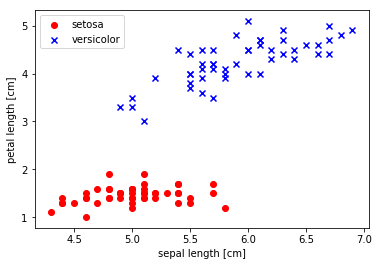

In [140]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[51:100,0], X[51:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

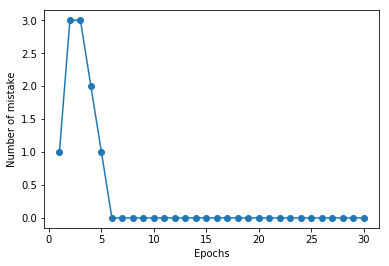

In [151]:
ppn = Perceptron(eta=0.01, n_iter=30)

ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of mistake')

plt.show()

In [152]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
    

In [153]:
# #テスト用
# from matplotlib.colors import ListedColormap
# import numpy as np 

# resolution=0.02

# markers = ('s', 'x', 'o', '^', 'v')
# colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
# cmap = ListedColormap(colors[:len(np.unique(y))])
    
# x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
# x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
# D = np.array([xx1.ravel(), xx2.ravel()])
# xx11 =xx1.reshape(xx1.shape)
# print("xx1 =", xx1)
# print("")
# print("xx1.ravel() =", xx1.ravel())
# print("")
# print("xx2 =", xx2)
# print("")
# print("xx2.ravel() =", xx2.ravel())
# print("")
# print("D=", D)
# print("")
# print("xx11=", xx11)
# print("")

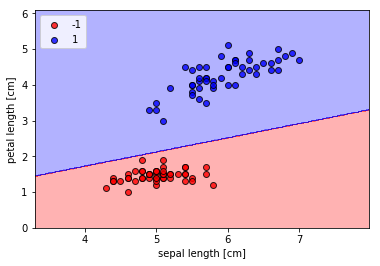

In [154]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()